In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import os
%matplotlib inline

def show_graph(graph, size=None, node_labels=None, planar=False, path=[], name=None, save=False):
    G = nx.Graph()
    if node_labels:
        for i, el in enumerate(node_labels):
            if i in path:
                path[path.index(i)] = el
            G.add_node(el)
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            if j > i and graph[i][j] > 0:
                if node_labels:
                    G.add_edge(node_labels[i], node_labels[j], weight=graph[i][j])
                else:
                    G.add_edge(i, j, weight=graph[i][j])
    if planar:
        pos = nx.planar_layout(G)
    else:
        pos=nx.spring_layout(G)
    _, ax = plt.subplots(1, 1, figsize=size)
    path_edges = list(zip(path,path[1:]))

    # Draw nodes and edges not included in path
    nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes)-set(path), ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=set(G.edges)-set(path_edges), ax=ax)

    # Draw nodes and edges included in path
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', ax=ax)

    # Draw labels
    nx.draw_networkx_labels(G, pos, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'), ax=ax)

    # Save to file
    if save:
        if not os.path.exists(os.getcwd() + "/saves"):
            os.makedirs(os.getcwd() + "/saves")
        if name:
            pass
        else:
            name = "graph.png"
        plt.savefig(f"saves/{name}.png", format="PNG")

In [10]:
def get_Q(G, s):
    mx = -1
    for i in range(len(G)):
        q_i = G[s][i]
        q_mx = G[s][mx]
        if q_i > q_mx:
            mx = i
    return G[s][mx]

In [11]:
def get_new_G(G, tops):
    def compare(G, tops1, tops2):
        mx = -1
        for top1 in tops1:
            for top2 in tops2:
                q = G[top1][top2]
                if q > mx:
                    mx = q
        return mx
    new_G = [[-1 for _ in range(len(tops))] for _ in range(len(tops))]
    for i, tops1 in enumerate(tops):
        for j, tops2 in enumerate(tops):
            if tops1 == tops2:
                new_G[i][j] = 0
            else:
                new_G[i][j] = compare(G, tops1, tops2)
    return new_G

In [12]:
def unite_tops(G, Q):
    added = []
    tops = []
    def f(G, top, i):
        for j in range(len(G)):
            if j not in added and G[top][j] >= Q:
                added.append(j)
                tops[i].append(j)
                f(G, j, i)
    for i in range(len(G)):
        if i not in added:
            tops.append([i])
            added.append(i)
            f(G, i, len(tops) - 1)
    return tops

In [13]:
def get_new_top(sp, p):
    for i, ls in enumerate(sp):
        if p in ls:
            return i

In [14]:
def union(s1, s2):
    result = [[] for _ in range(len(s2))]
    for i, unions in enumerate(s2):
        for j in unions:
            result[i].extend(s1[j])
    return result

In [15]:
def find_path(G, s, t, Q):
    def f(G, p, t, Q, added):
        ls = []
        for i in range(len(G)):
            if i not in added and G[p][i] >= Q:
                if i == t:
                    return added.copy() + [i]
                else:
                    sp = f(G, i, t, Q, added.copy() + [i])
                    if sp:
                        ls.append(sp)
        return min(ls, key=lambda x: len(x)) if ls else ls
    return f(G, s, t, Q, [s])

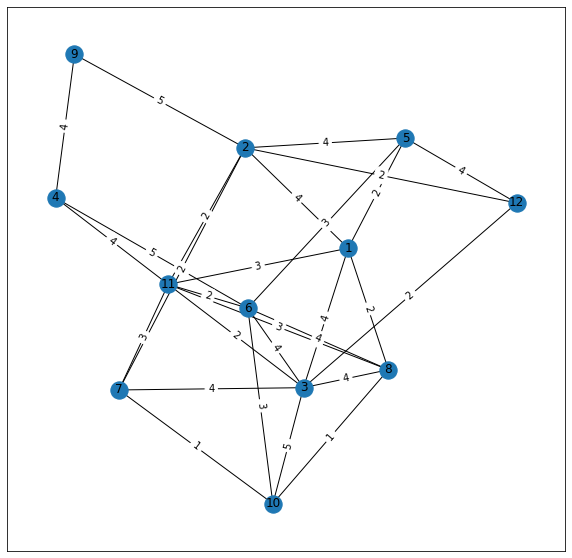

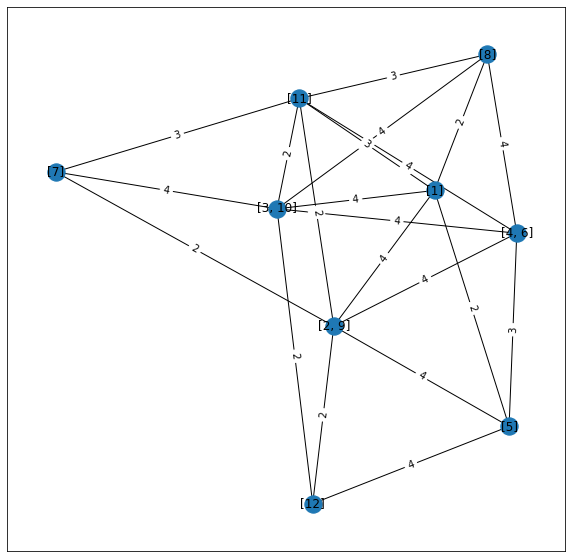

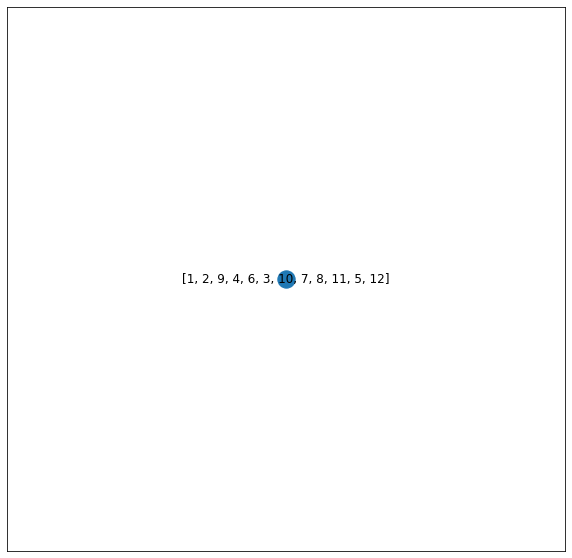

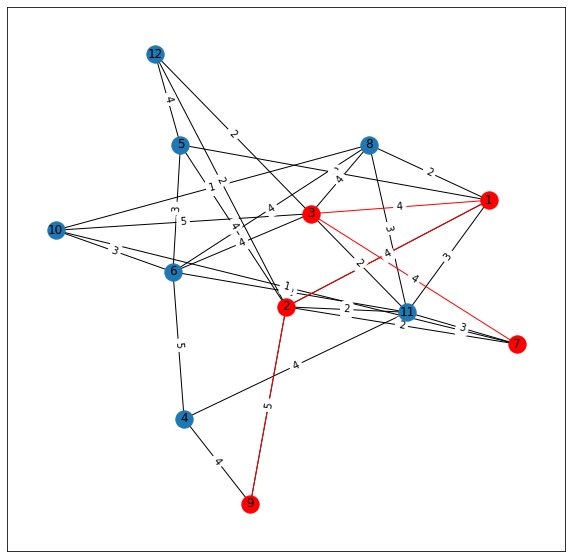

In [16]:
# <исходные данные>
G = [
    [0, 4, 4, 0, 2, 0, 0, 2, 0, 0, 3, 0],
    [4, 0, 0, 0, 4, 0, 2, 0, 5, 0, 2, 2],
    [4, 0, 0, 0, 0, 4, 4, 4, 0, 5, 2, 2],
    [0, 0, 0, 0, 0, 5, 0, 0, 4, 0, 4, 0],
    [2, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4],
    [0, 0, 4, 5, 3, 0, 0, 4, 0, 3, 2, 0],
    [0, 2, 4, 0, 0, 0, 0, 0, 0, 1, 3, 0],
    [2, 0, 4, 0, 0, 4, 0, 0, 0, 1, 3, 0],
    [0, 5, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 5, 0, 0, 3, 1, 1, 0, 0, 0, 0],
    [3, 2, 2, 4, 0, 2, 3, 3, 0, 0, 0, 0],
    [0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
]

s = 9
t = 7
# </исходные данные>

s -= 1
t -= 1
n = len(G)
topss = [[i] for i in range(n)]
p = s
G_ = G.copy()
show_graph(G, (10, 10), node_labels=[str(i + 1) for i in range(n)])

while (t not in topss[p]):
    Q = get_Q(G_, p)
    tops = unite_tops(G_, Q)
    topss = union(topss, tops)
    G_ = get_new_G(G_, tops)
    p = get_new_top(tops, p)
    show_graph(G_, (10, 10), node_labels=[str([i + 1 for i in el]) for el in topss])
path = find_path(G, s, t, Q)
show_graph(G, (10, 10), node_labels=[str(i + 1) for i in range(n)], path=path)